In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt

In [2]:
A_train = pd.read_csv("classificationA.train", sep  = "\t", names=["X1","X2","Y"])
B_train = pd.read_csv("classificationB.train", sep  = "\t", names=["X1","X2","Y"])
C_train = pd.read_csv("classificationC.train", sep  = "\t", names=["X1","X2","Y"])

A_test = pd.read_csv("classificationA.test", sep  = "\t", names=["X1","X2","Y"])
B_test = pd.read_csv("classificationB.test", sep  = "\t", names=["X1","X2","Y"])
C_test = pd.read_csv("classificationC.test", sep  = "\t", names=["X1","X2","Y"])

In [3]:
def qda_ml(data):
    N = data.Y.sum()
    n = data.Y.size
    Pi = N/n
    mu0 = data[['X1','X2']].mul(1-data.Y, axis=0).sum()/(n-N)
    mu1 = data[['X1','X2']].mul(data.Y, axis=0).sum()/N
    
    Centered_data_0 = (data[['X1','X2']]-mu0).mul(1-data.Y, axis=0)
    Centered_data_1 = (data[['X1','X2']]-mu1).mul(data.Y, axis=0)
    
    Sigma0 = Centered_data_0.T.dot(Centered_data_0)/(n-N)
    Sigma1 = Centered_data_1.T.dot(Centered_data_1)/N
    
    return Pi, mu0, mu1, Sigma0, Sigma1

In [4]:
def print_results(data):
    Pi, mu0, mu1, Sigma0, Sigma1 = qda_ml(data)
    print("PI")
    print(Pi)
    print("MU 0")
    print(mu0)
    print("MU 1")
    print(mu1)
    print("SIGMA 0")
    print(Sigma0)
    print("SIGMA 1")
    print(Sigma1)

## A_train

In [5]:
print_results(A_train)

PI
0.3333333333333333
MU 0
X1    2.899709
X2   -0.893874
dtype: float64
MU 1
X1   -2.692320
X2    0.866042
dtype: float64
SIGMA 0
          X1        X2
X1  2.310653 -1.047485
X2 -1.047485  0.575784
SIGMA 1
          X1        X2
X1  2.704422 -1.300851
X2 -1.300851  0.689696


## B_Train

In [6]:
print_results(B_train)

PI
0.5
MU 0
X1    3.340689
X2   -0.835463
dtype: float64
MU 1
X1   -3.216707
X2    1.083067
dtype: float64
SIGMA 0
          X1        X2
X1  2.538859  1.064211
X2  1.064211  2.960079
SIGMA 1
          X1        X2
X1  4.153611 -1.334541
X2 -1.334541  0.516071


## C_Train

In [7]:
print_results(C_train)

PI
0.625
MU 0
X1    2.793048
X2   -0.838387
dtype: float64
MU 1
X1   -2.942329
X2   -0.957828
dtype: float64
SIGMA 0
          X1        X2
X1  2.899139  1.245816
X2  1.245816  2.924754
SIGMA 1
          X1        X2
X1  2.869144 -1.761971
X2 -1.761971  6.564386


## Plot

In [8]:
def visualize(data):
    Pi, mu0, mu1, Sigma0, Sigma1 = qda_ml(data)
    
    #Set Points
    color = ['red' if l else 'green' for l in data.Y]
    plt.scatter(data.X1, data.X2, color=color)
    
    #Set Axes
    axes = plt.gca()
    axes.set_xlim([data.X1.min()-1,data.X1.max()+1])
    axes.set_ylim([data.X2.min()-1,data.X2.max()+1])
    
    #Set line separation 
    y,x=np.ogrid[data.X1.min()-100:data.X1.max()+100:10000j,data.X2.min()-100:data.X2.max()+100:10000j]
    
    detSigma0 = Sigma0.get_value('X1','X1')*Sigma0.get_value('X2','X2')-Sigma0.get_value('X1','X2')*Sigma0.get_value('X1','X2')
    detSigma1 = Sigma1.get_value('X1','X1')*Sigma1.get_value('X2','X2')-Sigma1.get_value('X1','X2')*Sigma1.get_value('X1','X2')
    
    Sigma0 = pd.DataFrame(np.linalg.pinv(Sigma0.values), Sigma0.columns, Sigma0.index)
    Sigma1 = pd.DataFrame(np.linalg.pinv(Sigma1.values), Sigma1.columns, Sigma1.index)
    
    A = Sigma1 - Sigma0
    a = A.get_value('X1','X1')
    b = A.get_value('X2','X2')
    c = A.get_value('X2','X1')
    
    B = 2*(Sigma0.dot(mu0)-Sigma1.dot(mu1)).transpose()
    d = B.get_value('X1','X1')
    e = B.get_value('X2','X2')
    
    C = ((mu1.T.dot(Sigma1)).dot(mu1))-((mu0.T.dot(Sigma0)).dot(mu0))
    E = 2*math.log((Pi*math.sqrt(detSigma0))/((1-Pi)*math.sqrt(detSigma1)))
    
    plt.contour(x.ravel(),y.ravel(),a*x*x+b*y*y+2*c*x*y+d*x+e*y+C-E,[0])
    
    #Visualize
    plt.show()

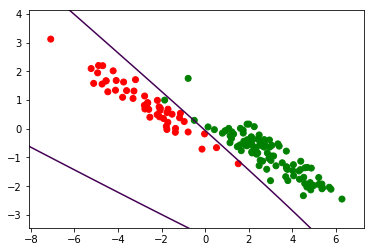

In [9]:
visualize(A_train)

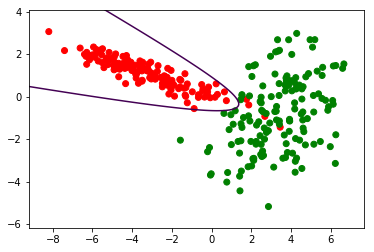

In [10]:
visualize(B_train)

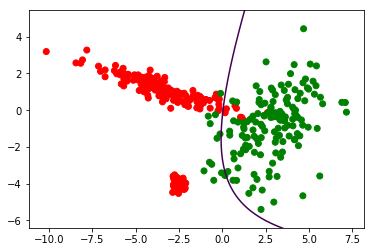

In [11]:
visualize(C_train)

## Predict

In [12]:
def predict(data):
    Pi, mu0, mu1, Sigma0, Sigma1 = qda_ml(data)
    data['pred'] = 0
    detSigma0 = Sigma0.get_value('X1','X1')*Sigma0.get_value('X2','X2')-Sigma0.get_value('X1','X2')*Sigma0.get_value('X1','X2')
    detSigma1 = Sigma1.get_value('X1','X1')*Sigma1.get_value('X2','X2')-Sigma1.get_value('X1','X2')*Sigma1.get_value('X1','X2')

    Sigma0 = pd.DataFrame(np.linalg.pinv(Sigma0.values), Sigma0.columns, Sigma0.index)
    Sigma1 = pd.DataFrame(np.linalg.pinv(Sigma1.values), Sigma1.columns, Sigma1.index)

    A = Sigma1 - Sigma0
    B = 2*(Sigma0.dot(mu0)-Sigma1.dot(mu1)).transpose()
    C = ((mu1.T.dot(Sigma1)).dot(mu1))-((mu0.T.dot(Sigma0)).dot(mu0))

    for i in range(data.Y.size):
        X = data[["X1","X2"]].iloc[[i]].T
        temp = 0.5*((X.T.dot(A)).dot(X)+B.dot(X)+C)
        const = ((1-Pi)*math.sqrt(detSigma1))/(Pi*math.sqrt(detSigma0)) 
        if const*math.exp(temp.get_value(i,i)) > 1:
            data.set_value(i,'pred', 0)
        else:
            data.set_value(i,'pred', 1)

In [13]:
predict(A_train)
predict(B_train)
predict(C_train)
predict(A_test)
predict(B_test)
predict(C_test)

In [14]:
(A_train.pred != A_train.Y).mean()

0.0066666666666666671

In [15]:
(B_train.pred != B_train.Y).mean()

0.013333333333333334

In [16]:
(C_train.pred != C_train.Y).mean()

0.052499999999999998

In [17]:
(A_test.pred != A_test.Y).mean()

0.016666666666666666

In [18]:
(B_test.pred != B_test.Y).mean()

0.02

In [19]:
(C_test.pred != C_test.Y).mean()

0.039333333333333331

## frontière test 

In [20]:
def visualize(data, data1):
    Pi, mu0, mu1, Sigma0, Sigma1 = qda_ml(data1)
    
    #Set Points
    color = ['red' if l else 'green' for l in data.Y]
    plt.scatter(data.X1, data.X2, color=color)
    
    #Set Axes
    axes = plt.gca()
    axes.set_xlim([data.X1.min()-1,data.X1.max()+1])
    axes.set_ylim([data.X2.min()-1,data.X2.max()+1])
    
    #Set line separation 
    y,x=np.ogrid[data.X1.min()-100:data.X1.max()+100:10000j,data.X2.min()-100:data.X2.max()+100:10000j]
    
    detSigma0 = Sigma0.get_value('X1','X1')*Sigma0.get_value('X2','X2')-Sigma0.get_value('X1','X2')*Sigma0.get_value('X1','X2')
    detSigma1 = Sigma1.get_value('X1','X1')*Sigma1.get_value('X2','X2')-Sigma1.get_value('X1','X2')*Sigma1.get_value('X1','X2')
    
    Sigma0 = pd.DataFrame(np.linalg.pinv(Sigma0.values), Sigma0.columns, Sigma0.index)
    Sigma1 = pd.DataFrame(np.linalg.pinv(Sigma1.values), Sigma1.columns, Sigma1.index)
    
    A = Sigma1 - Sigma0
    a = A.get_value('X1','X1')
    b = A.get_value('X2','X2')
    c = A.get_value('X2','X1')
    
    B = 2*(Sigma0.dot(mu0)-Sigma1.dot(mu1)).transpose()
    d = B.get_value('X1','X1')
    e = B.get_value('X2','X2')
    
    C = ((mu1.T.dot(Sigma1)).dot(mu1))-((mu0.T.dot(Sigma0)).dot(mu0))
    E = 2*math.log((Pi*math.sqrt(detSigma0))/((1-Pi)*math.sqrt(detSigma1)))
    
    plt.contour(x.ravel(),y.ravel(),a*x*x+b*y*y+2*c*x*y+d*x+e*y+C-E,[0])
    
    #Visualize
    plt.show()

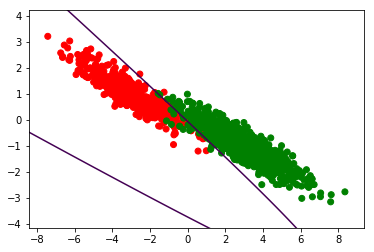

In [21]:
visualize(A_test, A_train)

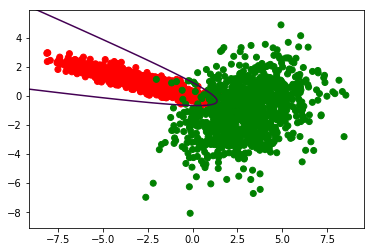

In [22]:
visualize(B_test, B_train)

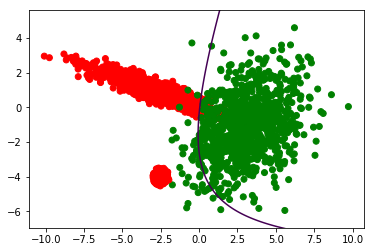

In [23]:
visualize(C_test, C_train)